In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
rho = 0.85
h = 0.016
m = 48
T = 1
M = 6 # cube root of number of unit cells in the L^3 volume, gives N=864 particles
L = np.cbrt((4*M**3)/rho)
sigma = 3.405 #Angstrom
epsilon = 119.8 #K
T = 2.0
sigma = 3.405 #Angstrom
epsilon = 119.8 #K
m = 48 # Be careful, m is also defined in the cython

tp = h

In [41]:
path_r_0 = "C:/Users/corin/CLionProjects/Computational-physics/r_total_T0_neighborhood_new.txt"
path_v_0 = "C:/Users/corin/CLionProjects/Computational-physics/v_total_T0_neighborhood_new.txt"

path_r_2 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T2_neighborhood_new.txt"
path_v_2 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T2_neighborhood_new.txt"

path_r_1 = r"C:\Users\corin\CLionProjects\Computational-physics\r_total_T1_neighborhood_new.txt"
path_v_1 = r"C:\Users\corin\CLionProjects\Computational-physics\v_total_T1_neighborhood_new.txt"


r_total = np.loadtxt(path_r_0, delimiter=",")
v_total = np.loadtxt(path_v_0, delimiter=",")

r_total_2 = np.loadtxt(path_r_2, delimiter=",")
v_total_2 = np.loadtxt(path_v_2, delimiter=",")

r_total_1 = np.loadtxt(path_r_1, delimiter=",")
v_total_1 = np.loadtxt(path_v_1, delimiter=",")

r_total_2.shape

(1295065, 3)

In [42]:
num_timesteps = 1498

r_total_cut = r_total[:864*num_timesteps - r_total.shape[0], :]
v_total_cut = v_total[:864*num_timesteps - v_total.shape[0], :]
r_total_reshaped = r_total_cut.reshape((num_timesteps, 864, 3))
v_total_reshaped = v_total_cut.reshape((num_timesteps, 864, 3))

r_total_2_cut = r_total_2[:864*num_timesteps - r_total_2.shape[0], :]
v_total_2_cut = v_total_2[:864*num_timesteps - v_total_2.shape[0], :]
r_total_2_reshaped = r_total_2_cut.reshape((num_timesteps, 864, 3))
v_total_2_reshaped = v_total_2_cut.reshape((num_timesteps, 864, 3))

r_total_1_cut = r_total_1[:864*num_timesteps - r_total_1.shape[0], :]
v_total_1_cut = v_total_1[:864*num_timesteps - v_total_1.shape[0], :]
r_total_1_reshaped = r_total_1_cut.reshape((num_timesteps, 864, 3))
v_total_1_reshaped = v_total_1_cut.reshape((num_timesteps, 864, 3))
print(v_total_1_reshaped.shape)

[[[-0.071028 -0.090399  0.027508]
  [ 0.223072 -0.025284 -0.084344]
  [-0.089824  0.004491  0.070263]
  ...
  [-0.199697 -0.131559  0.19169 ]
  [-0.160108  0.054379 -0.122576]
  [ 0.185476  0.029158  0.091584]]

 [[-0.070989 -0.090388  0.02748 ]
  [ 0.222993 -0.025269 -0.084315]
  [-0.089752  0.004405  0.07022 ]
  ...
  [-0.199641 -0.131507  0.191617]
  [-0.160048  0.054374 -0.122533]
  [ 0.185409  0.029139  0.091582]]

 [[-0.07087  -0.090353  0.027395]
  [ 0.222755 -0.025221 -0.084231]
  [-0.089537  0.004149  0.070093]
  ...
  [-0.199474 -0.13135   0.191402]
  [-0.159866  0.054363 -0.122404]
  [ 0.185207  0.029081  0.091577]]

 ...

 [[-0.034707 -0.010104 -0.029991]
  [ 0.001228 -0.110318  0.208603]
  [ 0.035859  0.056447  0.021175]
  ...
  [ 0.136331 -0.021309  0.083763]
  [ 0.047551  0.268088 -0.210857]
  [-0.032816  0.064693 -0.036166]]

 [[-0.029777 -0.015364 -0.02765 ]
  [-0.005176 -0.105485  0.207919]
  [ 0.035712  0.056117  0.023345]
  ...
  [ 0.135467 -0.019576  0.083887]
  [ 

In [43]:
"""
def clip_large_values(array, threshold):
    for t in range(array.shape[0]):
        for n_particle in range(array.shape[1]):
            for dim in range(3):
                if np.abs(array[t][n_particle][dim]) > threshold:
                    array[t][n_particle][dim] = 0
    return array

threshold_v = 10
threshold_r = 100
v_total_1_reshaped = clip_large_values(v_total_1_reshaped, threshold_v)
v_total_2_reshaped = clip_large_values(v_total_2_reshaped, threshold_v)
v_total_reshaped = clip_large_values(v_total_reshaped, threshold_v)
r_total_1_reshaped = clip_large_values(r_total_1_reshaped, threshold_r)
r_total_2_reshaped = clip_large_values(r_total_2_reshaped, threshold_r)
r_total_1_reshaped = clip_large_values(r_total_1_reshaped, threshold_r)
"""

'\ndef clip_large_values(array, threshold):\n    for t in range(array.shape[0]):\n        for n_particle in range(array.shape[1]):\n            for dim in range(3):\n                if np.abs(array[t][n_particle][dim]) > threshold:\n                    array[t][n_particle][dim] = 0\n    return array\n\nthreshold_v = 10\nthreshold_r = 100\nv_total_1_reshaped = clip_large_values(v_total_1_reshaped, threshold_v)\nv_total_2_reshaped = clip_large_values(v_total_2_reshaped, threshold_v)\nv_total_reshaped = clip_large_values(v_total_reshaped, threshold_v)\nr_total_1_reshaped = clip_large_values(r_total_1_reshaped, threshold_r)\nr_total_2_reshaped = clip_large_values(r_total_2_reshaped, threshold_r)\nr_total_1_reshaped = clip_large_values(r_total_1_reshaped, threshold_r)\n'

In [44]:
def Temperature(v):
    return 16 * np.mean([(v_i[0] ** 2) + (v_i[1] ** 2) + (v_i[2] ** 2) for v_i in v])

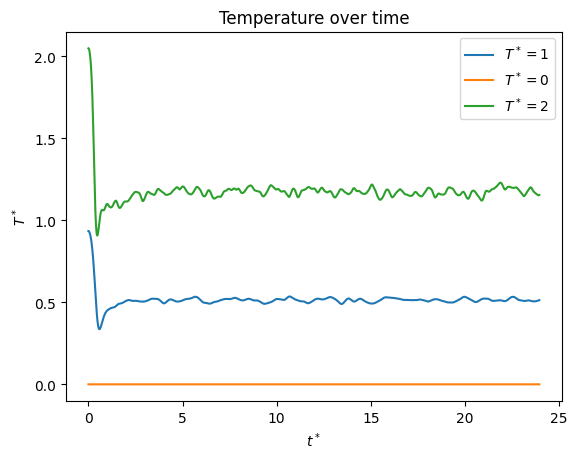

In [45]:
T_total_0 = [Temperature(v_t) for v_t in v_total_reshaped]#[:50]
T_total_1 = [Temperature(v_t) for v_t in v_total_1_reshaped]#[:50]
T_total_2 = [Temperature(v_t) for v_t in v_total_2_reshaped]#[:50]
plt.plot(np.arange(np.array(T_total_2).shape[0])*tp, T_total_1, label="$T^* = 1$")
plt.plot(np.arange(np.array(T_total_2).shape[0])*tp, T_total_0, label="$T^* = 0$")
plt.plot(np.arange(np.array(T_total_2).shape[0])*tp, T_total_2, label="$T^* = 2$")
plt.title("Temperature over time")
plt.xlabel("$t^*$")
plt.ylabel("$T^*$")
plt.legend()

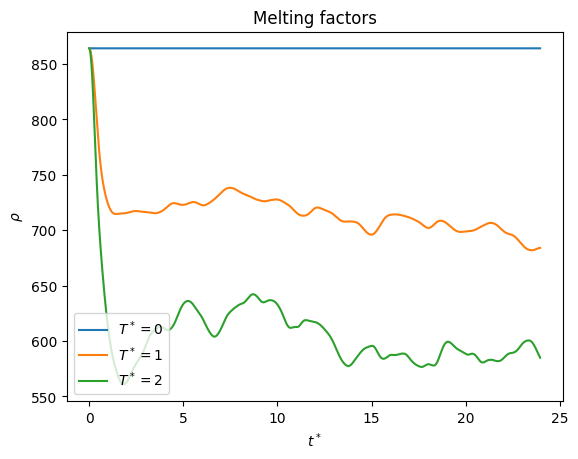

In [74]:
def melting_factor(x):
    """
    :param x: 1D array of shape (num_particles,), positions of all particles' x-positions at a certain time step
    :return: float, melting factor for the configuration
    """
    a = L/M
    k = 4*np.pi/a
    return np.sum([np.cos(k*i) for i in x])

melting_factors_0 = [melting_factor(r_total_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
melting_factors_1 = [melting_factor(r_total_1_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]
melting_factors_2 = [melting_factor(r_total_2_reshaped[t,:,0]) for t in range(r_total_reshaped.shape[0])]

plt.plot(np.arange(num_timesteps)*tp, melting_factors_0, label="$T^* = 0$")
plt.plot(np.arange(num_timesteps)*tp, melting_factors_1, label="$T^* = 1$")
plt.plot(np.arange(num_timesteps)*tp, melting_factors_2, label="$T^* = 2$")

plt.title("Melting factors")
plt.xlabel("$t^*$")
plt.ylabel(r"$\rho$")
plt.legend()

In [70]:
print(r_total_reshaped.shape)
print(r_total_reshaped[0].shape)
print(r_total_reshaped[0,:,0].shape)

(1498, 864, 3)
(864, 3)
(864,)


In [73]:
melting_factors_1

[863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
 863.9999999979427,
